# Binomial logistic Regression (Part 1)

In [1]:
# making the necessary imports
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# firing up the activity file and displaying some observations.
activity = pd.read_csv("activity.csv")

#displaying the first 5 observations 
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [3]:
# getting the summary of the statistics
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


## Constructing binomial logistic regression model 

For binomial logistic regression, we'll be using the `scikit-learn` package, which is frequently used for machine learning and more advanced data science topics. For the purposes of this exercise, we'll only load in the functions we need: `train_test_split()` and `LogisticRegression()`.

In [4]:
# load in sci-kit learn function for constructing logistic regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Then, we'll save the data into variables called X and y so we can use the `train_test_split()` function more easily. Remember that you can subset specific columns of a DataFrame object by using double square brackets: `[[]]` and listing the columns in between, separated by commas.

In [5]:
# Save X and y data into variables 
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]


splitting the data into training and holdout datasets. 
Going to set test_size = 0.3 so that the holdout dataset is only 30% of the total data we have.

We'll set the random_state equal to 42. Random state is mainly for reproducibility purposes 

In [6]:
# splitting the dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Bulding a classifier and fit the mode to the data by suing the .fit() function. and saving it to the variable clf
clf = LogisticRegression().fit(X=X_train, y=y_train)

c:\Users\12508\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Getting the coefficients and visualizing the model

using the coef_ and intercept_ attributes of the clf  object to get the coefficient and intercept of our model

In [8]:
#printing the coefficient
clf.coef_

array([[-0.1177471]])

In [9]:
# printing the intercept 
clf.intercept_

array([6.10180958])

So, based on what we've found, our model has an intercept or $\beta_0$ of 6.10 and a $\beta_1$ of -0.12. Now we can plot our model and data with a 95% confidence band using the `regplot()` function from the `seaborn` package. Remember to set the argument `logistic=True` so that the function knows we are plotting a logistic regression model, not a linear regression model.

# Ploting the logistic regression and its confidence band 

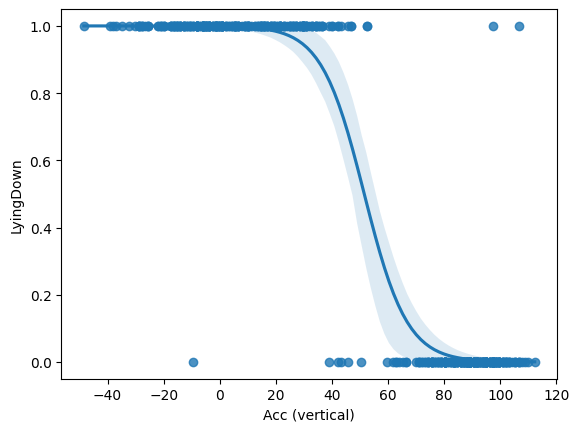

In [11]:
#plotting the Logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

#showing the plot
plt.show()